# Visualising & Mapping simulation results

## Reading and cleaning  the data

Import things

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import os
import pylab as plt

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
pwd

'/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/notebooks'

Identify the input files and read them in

In [3]:
namepart = "0.016_15_180_123456"#"0.06_100_12345"#_interrupted"#notravellers"
results_filename = "/Users/swise/workspace/worldbank/Disease-Modelling-SSA/java/WorldBankCovid19/results_" + namepart + ".txt"


In [ ]:
# When I have the output results at that level from the server runs, 
# what I want to do is graph them against the true data - both nationally and potentially for individual
# districts. The things I want to graph are national daily case numbers and cumulative national deaths
# One line for simulation one line for true

Infections available too!

In [4]:
#infections_filename = "/Users/swise/workspace/worldbank/Disease-Modelling-SSA/java/WorldBankCovid19/infections" + namepart + ".txt"
#i_data = pd.read_csv(infections_filename, sep='\t')

In [5]:
r_data = pd.read_csv(results_filename, sep='\t')
r_data['districtId'] = [int(str(x).split('_')[1]) for x in r_data["myId"]]


You can aggregate these and write them out to a file for visualisation in QGIS, if you so choose

In [6]:
r_data

time  myId  metric_died_count  metric_new_hospitalized  \
0         0  d_38                  0                        0   
1         0  d_39                  0                        0   
2         0  d_47                  0                        0   
3         0  d_48                  0                        0   
4         0  d_45                  0                        0   
...     ...   ...                ...                      ...   
10795   179  d_55                  0                        0   
10796   179  d_52                  0                        0   
10797   179  d_53                  0                        0   
10798   179  d_50                  0                        0   
10799   179  d_51                  0                        0   

       metric_new_critical  metric_new_cases_asympt  metric_new_cases_sympt  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       0   
...                    ...                      ...                     ...   
10795                    0                        0                       0   
10796                    0                        0                       0   
10797                    0                        0                       0   
10798                    0                        0                       0   
10799                    0                        0                       0   

       metric_new_deaths  Unnamed: 8  districtId  
0                      0         NaN          38  
1                      0         NaN          39  
2                      0         NaN          47  
3                      0         NaN          48  
4                      0         NaN          45  
...                  ...         ...         ...  
10795                  0         NaN          55  
10796                  0         NaN          52  
10797                  0         NaN          53  
10798                  0         NaN          50  
10799                  0         NaN          51  

[10800 rows x 10 columns]

In [7]:
r_agg = r_data.groupby('districtId').agg({'metric_died_count': 'max', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum'})
#r_agg = r_agg[r_agg['metric_new_cases_sympt'] > 5].sort_values(by='metric_new_cases_sympt', ascending=False)
#r_agg.to_csv("totalSympt.csv", sep=',')

In [8]:
r_agg[r_agg["metric_new_critical"] > 0]

metric_died_count  metric_new_hospitalized  metric_new_critical  \
districtId                                                                    
2                           0                        9                    1   
7                           0                        3                    2   
21                          1                        7                    3   
31                          0                        2                    1   
34                          0                        1                    1   
36                          0                        4                    1   
38                          0                        2                    1   

            metric_new_cases_asympt  metric_new_cases_sympt  
districtId                                                   
2                               150                     204  
7                                 5                       6  
21                               37                      77  
31                               16                      33  
34                                5                       8  
36                               31                      59  
38                               43                      78

Lazier aggregation also available

In [9]:
sum(r_data['metric_new_cases_sympt'])

672

## Graphing the outbreak curves

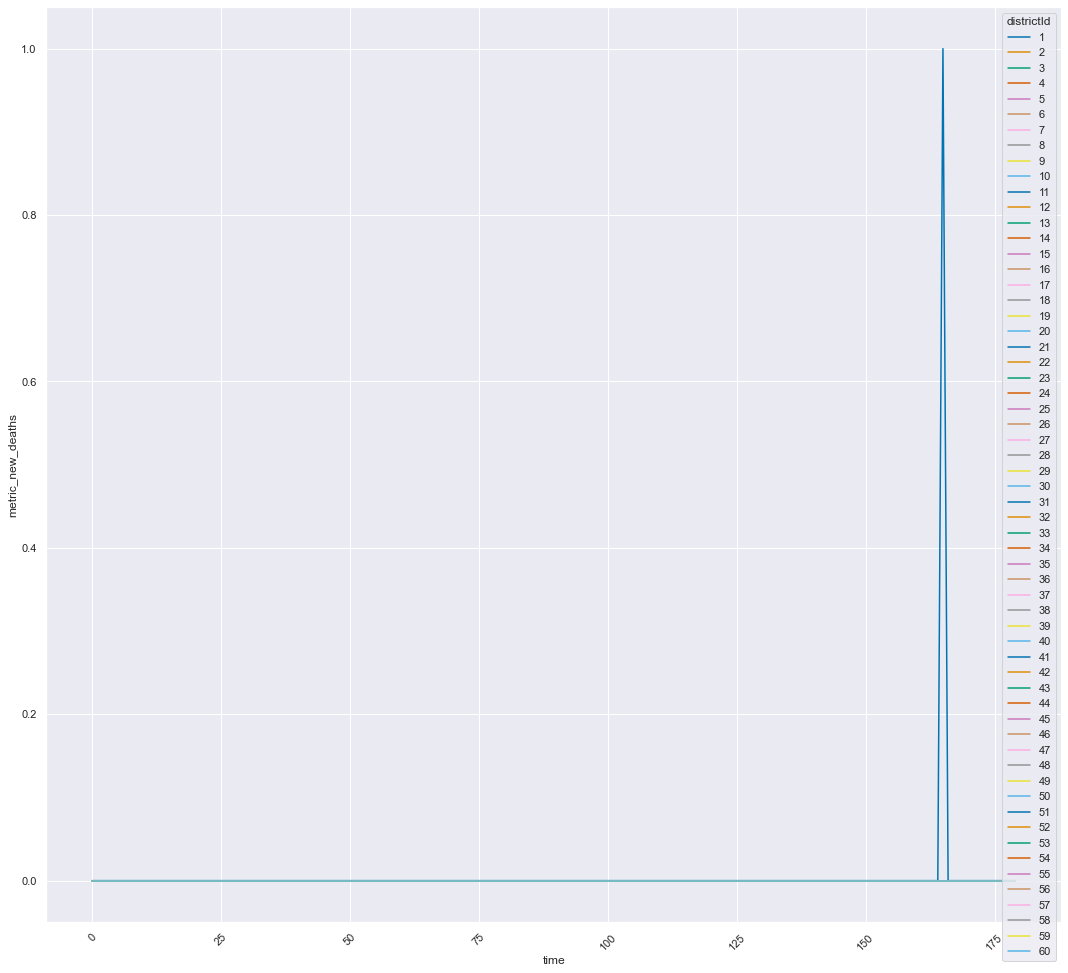

In [18]:
#sns.scatterplot(
fig, ax = plt.subplots (figsize = (15,15))
sns.lineplot(
             x="time", 
             y="metric_new_deaths",
             #y="metric_new_hospitalized",
             #y="metric_new_cases_sympt", 
             palette="colorblind", 
             hue="districtId",
             ax = ax,
             data=r_data#,
#            legend=False
            )#.legend(bbox_to_anchor= (1.03, 1) )

#ax.set_title('New Deaths', fontsize=20)
#ax.set_ylabel('Number of deaths')
#ax.legend(fontsize=10, title_fontsize=30, loc='upper left')
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#ax.patch.set_alpha(0)
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()

Country-level

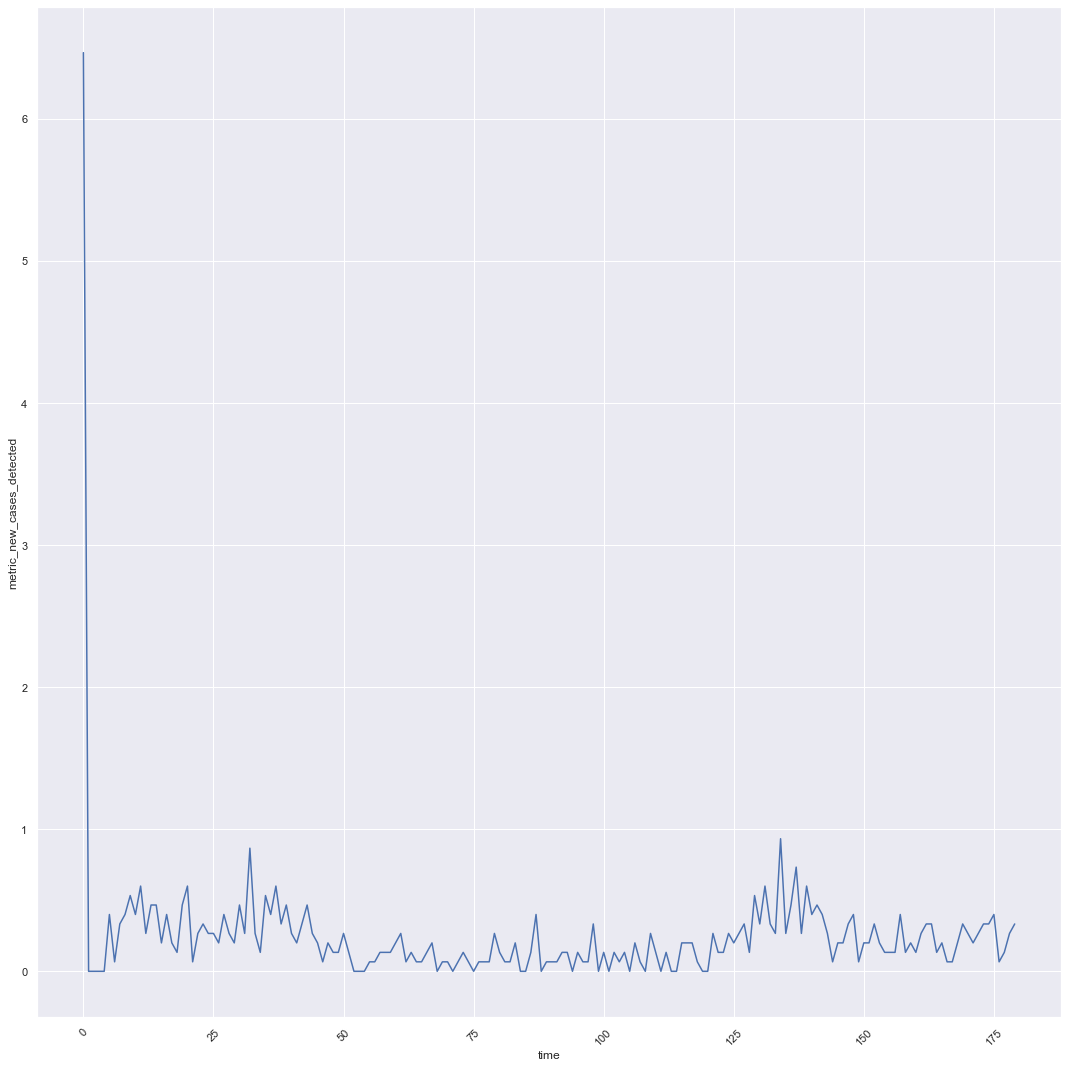

In [11]:
r_country_agg = r_data.groupby('time').agg({'metric_died_count': 'max', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum'})

lineListWeightingFactor = 15
r_country_agg['metric_new_cases_detected'] = r_country_agg['metric_new_cases_sympt'] / lineListWeightingFactor

#sns.scatterplot(
fig, ax = plt.subplots (figsize = (15,15))
sns.lineplot(
             x="time", 
             #y="metric_new_deaths",
             #y="metric_new_hospitalized",
             y="metric_new_cases_detected", 
             palette="colorblind", 
             ax = ax,
             data=r_country_agg#,
#            legend=False
            )#.legend(bbox_to_anchor= (1.03, 1) )

#ax.set_title('New Deaths', fontsize=20)
#ax.set_ylabel('Number of deaths')
#ax.legend(fontsize=10, title_fontsize=30, loc='upper left')
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#ax.patch.set_alpha(0)
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()

# Mapping results

In [4]:
import geopandas
import math

In [112]:
#path_to_data = geopandas.datasets.get_path()
rawLocs = geopandas.read_file("/Users/swise/workspace/worldbank/Disease-Modelling-SSA/data/raw/shapefiles/new_districts/ZWE_adm2.shp")
trunkRoads = geopandas.read_file("/Users/swise/workspace/worldbank/Disease-Modelling-SSA/data/raw/shapefiles/osm_trunk_roads.shp")

Join this with the previous data!

In [14]:
dataLocs = rawLocs.merge(r_agg, how="left", left_on=['ID_2'], right_on=['districtId'])

In [16]:
dataLocs["log_died"] = [max(0, math.log10(max(y, .00000001))) for y in dataLocs["metric_died_count"]]
dataLocs["log_sympt"] = [max(0, math.log10(max(y, .00000001))) for y in dataLocs["metric_new_cases_sympt"]]


<AxesSubplot:>

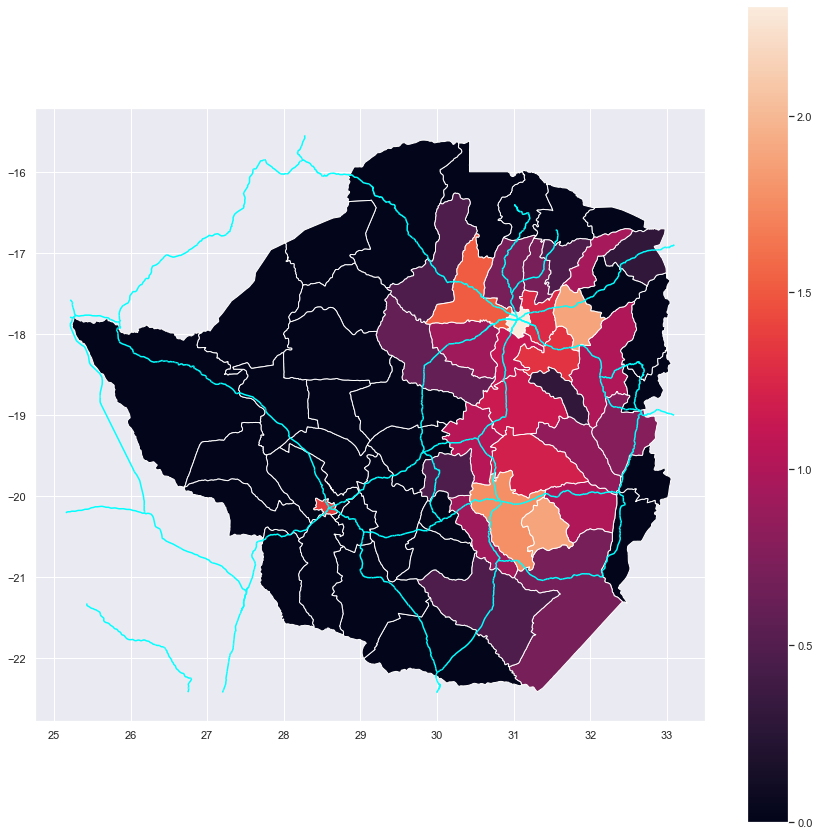

In [17]:
fig, ax = plt.subplots (figsize = (15,15))
#dataLocs.plot("metric_new_cases_sympt", ax = ax, legend=True)
dataLocs.plot("log_sympt", ax = ax, legend=True)

trunkRoads.plot(ax=ax, color="cyan")


COMPARE TO [this](https://ourworldindata.org/covid-deaths)